<a href="https://colab.research.google.com/github/gotjd709/AI_class_KSA/blob/main/12_04_Fri_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

w = -3.0 	 c = 176.0
w = -2.099999999999999 	 c = 105.70999908447266
w = -1.0999999999999983 	 c = 48.5099983215332
w = -0.09999999999999742 	 c = 13.3100004196167
w = 2.6645352591003757e-15 	 c = 11.0
w = 1.0000000000000036 	 c = 0.0
w = 2.0000000000000044 	 c = 11.0
w = 3.0000000000000053 	 c = 44.0
w = 4.000000000000006 	 c = 99.0


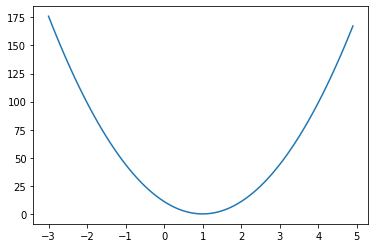

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

X = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)
Y = tf.constant([1, 2, 3, 4, 5], dtype=tf.float32)

def loss(W):
  H = W * X
  cost = tf.reduce_mean(tf.square(H - Y))
  return cost.numpy()

W_val = []
cost_val = []
for w in np.arange(-3.0, 5.0, 0.1):
  c = loss(w)
  W_val.append(w)
  cost_val.append(c)
  if int(w*10) % 10 == 0:
    print(f"w = {w} \t c = {c}")

plt.plot(W_val, cost_val)
plt.show()


In [ ]:
## Hypothesis(가설) 정의
# data
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(tf.random.normal([1]), name='Weight')
B = tf.Variable(tf.random.normal([1]), name='Bias')

@tf.function
def Hypothesis(X):
 return W * X + B

In [ ]:
## cost/loss 함수 정의
@tf.function
def loss(H, Y):
 return tf.reduce_mean(tf.square(H - Y))

In [ ]:
## train 함수 정의
@tf.function
def train(X, Y, learning_rate=0.01):
  with tf.GradientTape() as tape:
    _loss = loss(Hypothesis(X), Y)
  _w, _b = tape.gradient(_loss, [W, B])
  W.assign_sub(learning_rate * _w) # 텐서의 값 변경을 위한 메소드
  B.assign_sub(learning_rate * _b) # assign(=), assign_add(+=), assign_sub(-=)

In [ ]:
## Training
for step in range(2001):
  train(x_data, y_data, learning_rate=0.01)
  _c = loss(Hypothesis(x_data), y_data)
  if step % 20 == 0:
    print(f"{step}: {_c.numpy()} {W.numpy()} {B.numpy()}")  
print('\nfinal W =', W.numpy(), 'b =', B.numpy())


TypeError: ignored

In [ ]:
for step in range(2001):
  train(x_data, y_data, learning_rate=0.01)
  _c = loss(Hypothesis(x_data), y_data)
  if step % 20 == 0:
    print(f"{step}: {_c.numpy()} {W.numpy()} {B.numpy()}")
print('\nfinal W =', W.numpy(), 'b =', B.numpy())

TypeError: ignored

In [ ]:
#test data
test_data = [2, 4, 1, 5, 3]
for data in test_data:
  y = data * W.numpy() + B.numpy()
  print("X =", data, "then Y =", y)


X = 2 then Y = [-0.873053]
X = 4 then Y = [-1.3215895]
X = 1 then Y = [-0.64878476]
X = 5 then Y = [-1.5458577]
X = 3 then Y = [-1.0973213]


In [ ]:
import tensorflow as tf
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]
W = tf.Variable(tf.random.normal([1]), name='Weight')
B = tf.Variable(tf.random.normal([1]), name='Bias')

@tf.function
def Hypothesis(X):
  return W * X + B

@tf.function
def loss(H, Y):
  return tf.reduce_mean(tf.square(H - Y))

@tf.function
def train(X, Y, learning_rate=0.01):
  with tf.GradientTape() as tape:
    _loss = loss(Hypothesis(X), Y)
  _w, _b = tape.gradient(_loss, [W, B])
  W.assign_sub(learning_rate * _w) # 텐서의 값 변경을 위한 메소드
  B.assign_sub(learning_rate * _b) # assign(=), assign_add(+=), assign_sub(-=)

for step in range(2001):
  train(x_data, y_data, learning_rate=0.01)
  _c = loss(Hypothesis(x_data), y_data)
  if step % 20 == 0:
    print(f"{step}: {_c.numpy()} {W.numpy()} {B.numpy()}")
print('\nfinal W =', W.numpy(), 'b =', B.numpy())

#test data
test_data = [2, 4, 1, 5, 3]
for data in test_data:
  y = data * W.numpy() + B.numpy()
  print("X =", data, "then Y =", y)


0: 2.0953519344329834 [0.8582062] [-1.0081949]
20: 0.1287611424922943 [1.2311627] [-0.84143674]
40: 0.11241336911916733 [1.2176663] [-0.7858754]
60: 0.09817145019769669 [1.2034186] [-0.73440576]
80: 0.08573393523693085 [1.1900966] [-0.686309]
100: 0.07487201690673828 [1.177647] [-0.64136195]
120: 0.06538628041744232 [1.1660128] [-0.5993586]
140: 0.057102322578430176 [1.1551404] [-0.56010616]
160: 0.049867890775203705 [1.1449801] [-0.5234243]
180: 0.04354998096823692 [1.1354852] [-0.48914477]
200: 0.03803248703479767 [1.1266122] [-0.45711023]
220: 0.03321407735347748 [1.1183202] [-0.42717364]
240: 0.029006117954850197 [1.1105714] [-0.39919776]
260: 0.02533123269677162 [1.1033299] [-0.37305406]
280: 0.02212197706103325 [1.0965629] [-0.34862244]
300: 0.01931926980614662 [1.0902388] [-0.32579085]
320: 0.01687166467308998 [1.084329] [-0.3044546]
340: 0.014734180644154549 [1.0788063] [-0.2845156]
360: 0.012867447920143604 [1.0736451] [-0.26588243]
380: 0.011237229220569134 [1.068822] [-0.248

In [ ]:
x_data = tf.constant(
  [[73, 80, 75],
  [93, 88, 93],
  [89, 91, 90],
  [96, 98, 100],
  [73, 66, 70]], dtype=tf.float32)
y_data = tf.constant(
  [[152],
  [185],
  [180],
  [196],
  [142]], dtype=tf.float32)

W = tf.Variable(tf.random.normal([3, 1]), name='weight')
B = tf.Variable(tf.random.normal([1]), name='bias')

@tf.function
def Hypothesis(X):
  return tf.matmul(X, W) + B

In [ ]:
@tf.function
def loss(H, Y):
  return tf.reduce_mean(tf.square(H - Y))


In [ ]:
@tf.function
def train(X, Y, learning_rate = 1e-5):
  with tf.GradientTape() as tape:
    _loss = loss(Hypothesis(X), Y)
  _w, _b = tape.gradient(_loss, [W, B])
  W.assign_sub(learning_rate * _w)
  B.assign_sub(learning_rate * _b)

In [ ]:
for step in range(10001):
  # _h = Hypothesis(x_data)
  _c = loss(Hypothesis(x_data), y_data)
  train(x_data, y_data, learning_rate=1e-5)
  if step % 20 == 0:
    print(f"{step}: {_c.numpy()}")

0: 90580.28125
20: 126.65618896484375
40: 125.31361389160156
60: 123.98570251464844
80: 122.67192077636719
100: 121.3725357055664
120: 120.08685302734375
140: 118.81502532958984
160: 117.5570297241211
180: 116.31239318847656
200: 115.08134460449219
220: 113.86357116699219
240: 112.65873718261719
260: 111.46684265136719
280: 110.28792572021484
300: 109.1218032836914
320: 107.96783447265625
340: 106.82667541503906
360: 105.6976547241211
380: 104.5806884765625
400: 103.47586822509766
420: 102.38292694091797
440: 101.30158996582031
460: 100.23217010498047
480: 99.1741943359375
500: 98.12739562988281
520: 97.0920181274414
540: 96.06781768798828
560: 95.05471801757812
580: 94.05216217041016
600: 93.06074523925781
620: 92.07981872558594
640: 91.10968780517578
660: 90.1496353149414
680: 89.20021057128906
700: 88.26082611083984
720: 87.33158874511719
740: 86.41224670410156
760: 85.5030288696289
780: 84.60346984863281
800: 83.71357727050781
820: 82.8333740234375
840: 81.96253967285156
860: 81.10

In [ ]:
test_data = tf.constant(
  [[ 73, 80, 75],\
   [ 93, 88, 93],\
   [ 89, 91, 90],\
   [ 96, 98, 100],\
   [ 73, 66, 70],\
   [100, 70, 101],\
   [ 60, 70, 110],\
   [ 90, 100, 80]], dtype=tf.float32)

print("Testing...")
for data in test_data:
  y = Hypothesis([data])
  print("X =", data.numpy(), "thenY =", y.numpy())

Testing...
X = [73. 80. 75.] thenY = [[153.6765]]
X = [93. 88. 93.] thenY = [[183.38791]]
X = [89. 91. 90.] thenY = [[181.56741]]
X = [ 96.  98. 100.] thenY = [[194.49985]]
X = [73. 66. 70.] thenY = [[142.37036]]
X = [100.  70. 101.] thenY = [[173.42746]]
X = [ 60.  70. 110.] thenY = [[111.59732]]
X = [ 90. 100.  80.] thenY = [[195.44955]]


In [ ]:
# training data
x_data = tf.constant([[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]], dtype=tf.float32)
y_data = tf.constant([[0], [0], [0], [1], [1], [1]], dtype=tf.float32)

W = tf.Variable(tf.random.normal([2, 1]), name='weight')
B = tf.Variable(tf.random.normal([1]), name='bias')
# define hypothesis
@tf.function
def Hypothesis(X):
  return tf.sigmoid(tf.matmul(X, W) + B)

In [ ]:
# define cost function
@tf.function
def loss(H, Y):
  cost = -tf.reduce_mean(Y * tf.math.log(H) + (1 - Y) * tf.math.log(1 - H))
  return cost

In [ ]:
# minimize the cost function
@tf.function
def train(X, Y, learning_rate=0.1):
  with tf.GradientTape() as tape:
    _loss = loss(Hypothesis(X), Y)
  _w, _b = tape.gradient(_loss, [W, B])
  W.assign_sub(learning_rate * _w)
  B.assign_sub(learning_rate * _b)

In [ ]:
# training...
for step in range(10001):
  _c = loss(Hypothesis(x_data), y_data)
  train(x_data, y_data, learning_rate=0.1)
  if step % 500 == 0:
    print(f"{step}: {_c.numpy()}")

0: 1.858324408531189
500: 0.25768956542015076
1000: 0.15694180130958557
1500: 0.11261191964149475
2000: 0.08802592754364014
2500: 0.07239822298288345
3000: 0.06156863272190094
3500: 0.053608108311891556
4000: 0.04750162363052368
4500: 0.04266385734081268
5000: 0.03873360902070999
5500: 0.035475268959999084
6000: 0.032728854566812515
6500: 0.030381590127944946
7000: 0.02835177443921566
7500: 0.026578621938824654
8000: 0.025016071274876595
8500: 0.023628495633602142
9000: 0.02238778956234455
9500: 0.021271809935569763
10000: 0.020262431353330612


In [ ]:
# accuracy computation
@tf.function
def test(H, Y):
  # True if H > 0.5 else False
  predicted = tf.cast(H > 0.5, dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y),\ dtype=tf.float32))
  return predicted, accuracy

# report accuracy...
print("\nAccuracy...")
_h = Hypothesis(x_data)
_p, _a = test(_h, y_data)
print("Hypothesis =\n", _h.numpy())
print("Predicted =\n", _p.numpy())
print("\nAccuracy =", _a.numpy())


SyntaxError: ignored